In [1]:
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
s_fac = [-1.0602920937388272, -1.0283037725521609, -0.9964929612909224, -0.9636043034867319, -0.9317050926331844, -0.9002846018819294, -0.8688735753325981, -0.8370489627240931, -0.8067599436485883, -0.7683690191739344]
r_fac = [-3.807004514471803, -1.76338530458236, -1.1248941580099152, -0.8074013769804727, -0.6239965684290713, -0.5065490570873593, -0.4198904706114322, -0.35751799752342656, -0.3081828290251063, -0.2784458612526665]

In [2]:
r_0 = []
rratio = []
for i in range(10):
    r_0.append(-1.0 / (gamma[i] * s_fac[i]))
    rratio.append(r_fac[i]/ s_fac[i])
print(r_0)

[9.431363356429229, 4.862376404192735, 3.345064604385278, 2.5944259391058466, 2.1466019836250987, 1.8512664363943512, 1.644164892486899, 1.4933415554712575, 1.3772512131503314, 1.3014579909469668]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

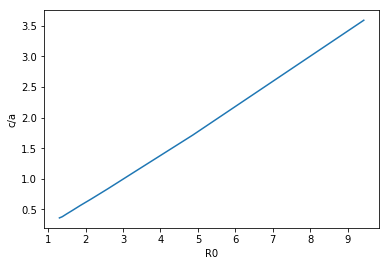

In [4]:
plt.xlabel("R0")
plt.ylabel("c/a")
plt.plot(r_0, rratio)

In [5]:
import numpy, pandas
titles = ['r_0', 'rratio']
matrix = [r_0, rratio]
df = pandas.DataFrame(numpy.array(matrix).T, columns=titles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_0,10.0,3.004731,2.511944,1.301458,1.531047,1.998934,3.157405,9.431363
rratio,10.0,1.015928,0.997007,0.362386,0.441152,0.616195,1.056114,3.590524


In [6]:
df.corr()

,r_0,rratio
r_0,1.000000,0.999796
rratio,0.999796,1.000000


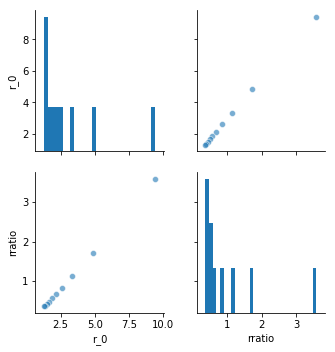

In [7]:
import seaborn as sns
sns.pairplot(df,
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
y = df['rratio'].values
df = df.drop('rratio', axis=1)
x = df.values
lm = LinearRegression(fit_intercept=True)
lm.fit(x, y)
y_pred = lm.predict(x)
msg = 'model: rratio = {} + {} R_0'.format(lm.intercept_, lm.coef_[0])
print(msg)

model: rratio = -0.1764272046739317 + 0.3968257353949572 R_0
